### Note 
1) Used for non-linear dataset and outlier detection 
2) minpoint, Epn(r),core_point(noPoint >= min_point),boundary_point(noPiont < minpoint>),Noise_point(outlier)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_moons

In [3]:
make_moons

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

In [4]:
x,y = make_moons(n_samples=250,noise=0.5)

In [5]:
df = pd.DataFrame(x,columns=['first_column','second_column'])

In [6]:
df

,first_column,second_column
0,0.926385,0.934615
1,0.082107,0.565365
2,-0.763080,0.889903
3,-0.964414,-0.011230
4,1.052271,-0.538527
...,...,...
245,1.788602,0.232550
246,0.634832,-0.185268
247,1.941977,0.362000
248,0.186258,0.286386


In [7]:
df2 = pd.DataFrame(y,columns=["classifications"])

In [8]:
df2

,classifications
0,0
1,0
2,0
3,0
4,1
...,...
245,1
246,1
247,0
248,1


In [9]:
df2.isna().sum()

classifications    0
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   classifications  250 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [11]:
new_df = pd.concat([df,df2])

In [12]:
new_df

,first_column,second_column,classifications
0,0.926385,0.934615,NaN
1,0.082107,0.565365,NaN
2,-0.763080,0.889903,NaN
3,-0.964414,-0.011230,NaN
4,1.052271,-0.538527,NaN
...,...,...,...
245,NaN,NaN,1.0
246,NaN,NaN,1.0
247,NaN,NaN,0.0
248,NaN,NaN,1.0


In [13]:
df = {"data1":x[:,0],"data2":x[:,1],"output":y}

In [14]:
new_df = pd.DataFrame(df)

In [15]:
new_df

,data1,data2,output
0,0.926385,0.934615,0
1,0.082107,0.565365,0
2,-0.763080,0.889903,0
3,-0.964414,-0.011230,0
4,1.052271,-0.538527,1
...,...,...,...
245,1.788602,0.232550,1
246,0.634832,-0.185268,1
247,1.941977,0.362000,0
248,0.186258,0.286386,1


<Axes: xlabel='data1', ylabel='data2'>

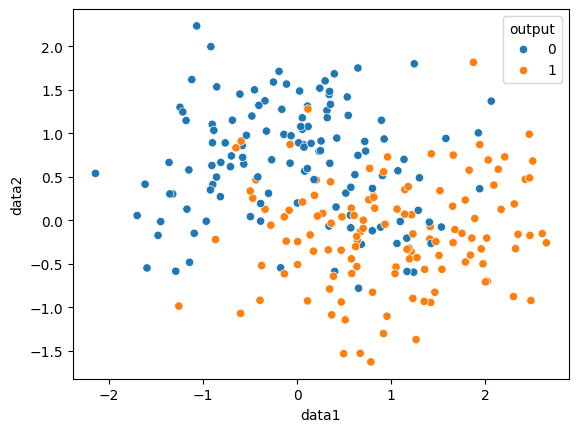

In [16]:
sns.scatterplot(x="data1",y="data2",data=new_df,hue="output")

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
db = DBSCAN(eps=0.5,min_samples=5)

In [19]:
new_df["predicted"] = db.fit_predict(new_df)

In [20]:
new_df.tail(5)

,data1,data2,output,predicted
245,1.788602,0.232550,1,1
246,0.634832,-0.185268,1,1
247,1.941977,0.362000,0,-1
248,0.186258,0.286386,1,1
249,2.064994,1.370342,0,-1


<Axes: xlabel='data1', ylabel='data2'>

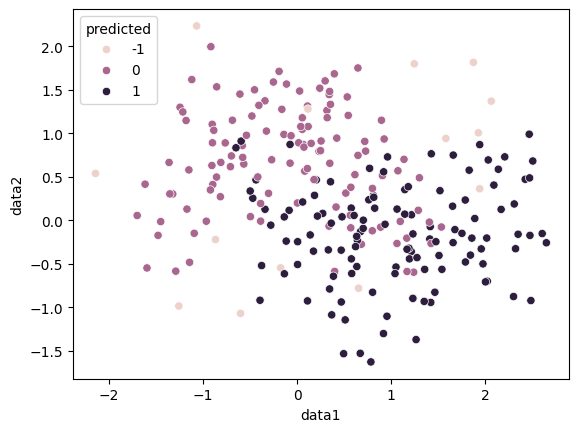

In [21]:
sns.scatterplot(x="data1",y="data2",data=new_df,hue="predicted")